<a href="https://colab.research.google.com/github/mani-312/Data-Science-and-Business-Analytics-Internship/blob/main/iris_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font color="orange" size="6"><b>Sparks Foundation</b></font></center><br>
<font size="5"><b>Data Science and Business Analytics internship</b></font><br><br>
<font size="4"><b>Name : Manikanta Bandla</b></font><br><br>

<font size="4"><b><font color="blue">Task #2:</font> Prediction using Unsupervised ML</b></font><br><br>
<font size="4"><b><font color="blue">Problem Statement :</font>Predict the optimum number of clusters in iris dataset and
represent it visually.</b></font>

In [ ]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss

In [ ]:
# Reading the csv file of iris dataset
df=pd.read_csv("C:/Users/MANIKANTA/Desktop/GRIP/Iris.csv")

In [ ]:
# Getting first 5 rows in dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
# Drop the index row
# Drop the labels row i.e "Species" as we are building Unsupervised algorithm
df1 = df.drop(["Id","Species"],axis="columns")

In [ ]:
# Datatypes of each column
df1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [ ]:
# Checking are there any rows with null values
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

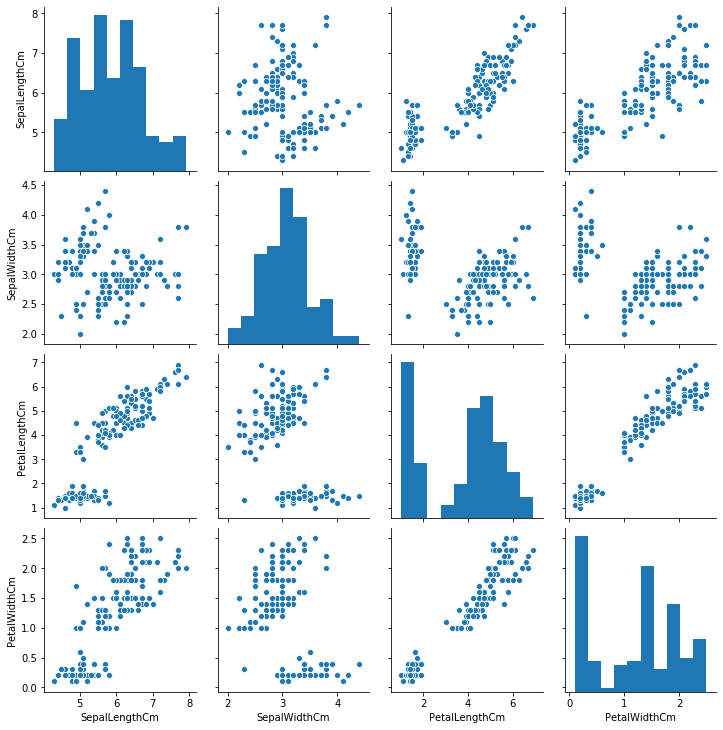

In [ ]:
# Visualizing using pairplot with a pair of two columns
ss.pairplot(df1)

In [ ]:
# Converting a dataframe into numpy array
iris = df1.values
iris.shape

(150, 4)

In [ ]:
# Training with K-Means algorithm with K=[1,10] (K = Number of clusters)
# WCSS stands for Sum of Squares within the clusters
# K-Means Algorithm tries to minimize the WCSS
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(iris)
    WCSS.append(model.inertia_)

Text(0, 0.5, 'WCSS')

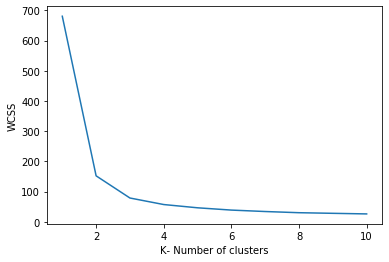

In [ ]:
# Visualizing K vs WCSS
plt.plot(range(1,11),WCSS)
plt.xlabel("K- Number of clusters")
plt.ylabel("WCSS")

<b>Using elbow method to find the optimum number of clusters.</b><br><b>
<font color="blue">Optimum number of clusters(K)</font> is the value at which elbow occurs in graph</b><br>
<b> Therefore K = 3 .</b>

In [ ]:
# From the above graph K = 3 is the best(elbow position)
# Train the iris dataset with K = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Stack the output labels to the dataset
iris = np.hstack([iris,model.labels_.reshape(-1,1)])
iris

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

In [ ]:
# Append the column labels to the dataframe
df1["labels"]=model.labels_

In [ ]:
# Get the cluster centers
centers = pd.DataFrame(model.cluster_centers_)

In [ ]:
# Append a column labels describing the centroids as a label "3"
center_label = pd.DataFrame(np.array([[3],[3],[3]]))
centers = pd.concat([centers,center_label],axis="columns")

In [ ]:
# Column names of centers should be compatible with column names of df1
centers.columns = df1.columns

In [ ]:
# Append the centers to df1 in row-wise
df1 = df1.append(centers)
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.100000,3.500000,1.400000,0.200000,1
1,4.900000,3.000000,1.400000,0.200000,1
2,4.700000,3.200000,1.300000,0.200000,1
3,4.600000,3.100000,1.500000,0.200000,1
4,5.000000,3.600000,1.400000,0.200000,1
...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,2
149,5.900000,3.000000,5.100000,1.800000,0
0,5.901613,2.748387,4.393548,1.433871,3
1,5.006000,3.418000,1.464000,0.244000,3


In [ ]:
# Names corresponding to labels
class_names = {0:"Flower_1", 1:"Flower_2", 2:"Flower_3", 3:"Centroid"}

In [ ]:
# Change labels in dataframe to corresponding names
df1["labels"] = df1["labels"].apply(lambda x: class_names[x])
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.100000,3.500000,1.400000,0.200000,Flower_2
1,4.900000,3.000000,1.400000,0.200000,Flower_2
2,4.700000,3.200000,1.300000,0.200000,Flower_2
3,4.600000,3.100000,1.500000,0.200000,Flower_2
4,5.000000,3.600000,1.400000,0.200000,Flower_2
...,...,...,...,...,...
148,6.200000,3.400000,5.400000,2.300000,Flower_3
149,5.900000,3.000000,5.100000,1.800000,Flower_1
0,5.901613,2.748387,4.393548,1.433871,Centroid
1,5.006000,3.418000,1.464000,0.244000,Centroid


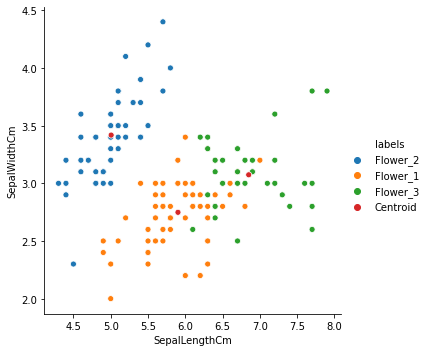

In [ ]:
# Visualize the clusters with pair of first two columns
ss.relplot(x = df1.columns[0], y = df1.columns[1], hue ="labels",data = df1)

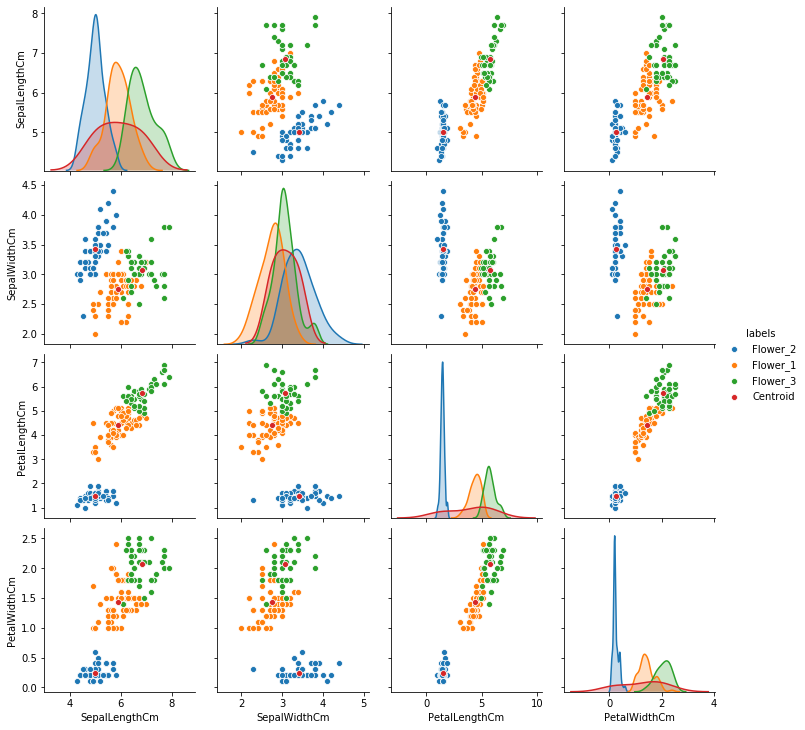

In [ ]:
# Pairplot to visualize the clusters with every pair of columns
ss.pairplot(df1,hue="labels")